<a href="https://colab.research.google.com/github/profandersonvanin01/python_introducao/blob/main/9__Analise_de_Dados_Campanha_de_Marketing_de_um_Banco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

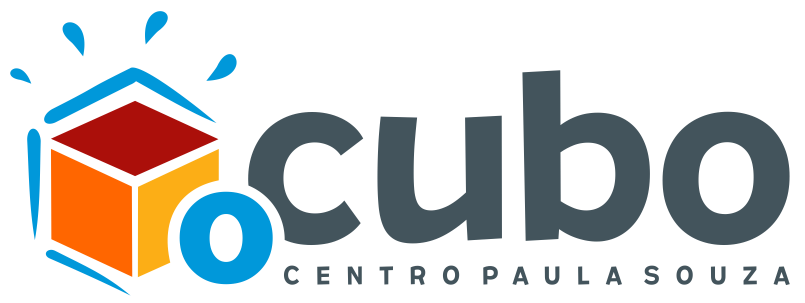

# Testando Base de um Banco para identificar efetividade de uma campanha de marketing por telefone

## Artigo escrito após este trabalho
Perfil no Researchgate.net:
https://www.researchgate.net/profile/Cintia-Maria-Pinho

Artigo na Revista:
https://rsdjournal.org/index.php/rsd/article/view/10491

## Bibliotecas Necessárias


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
# algoritmos de classificação
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
#esse código permite ter acesso ao aquivo que está dentro do Drive
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
#cópia para baixar a base de dados e colocar no seu colab
#https://drive.google.com/file/d/1CMqyN9LImHG1qa1oLF9awtUj5RzijdfG/view?usp=sharing

In [ ]:
# subindo base de dados
#Pegando Base do Github
#Caso não salve essa base de dados no seu Drive, deverá usar o código abaixo.
bank=pd.read_csv('https://raw.githubusercontent.com/profandersonvanin01/python_introducao/main/bank.csv')
bank.head()

In [ ]:
bank

## Summay of data

### Categorical Variables :
**[1] job (TRABALHO)    :** admin,technician, services, management, retired, blue-collar, unemployed, entrepreneur,
               housemaid, unknown, self-employed, student
<br>**[2] marital (ESTADO CIVIL)  :** married, single, divorced
<br>**[3] education (NIVEL ESCOLAR):** secondary, tertiary, primary, unknown
<br>**[4] default(TEM CRÉDITO ATUALMENTE)  :** yes, no
<br>**[5] housing (EMPRÉSTIMO HABITACIONAL)  :** yes, no
<br>**[6] loan (EMPRÉSTIMO PESSOAL)    :** yes, no 
<br>**[7] deposit (ASSINOU CONTRATO DE INVESTIMENTO?)  :** yes, no ** (VARIÁVEL PREDITORA)**
<br>**[8] contact (TIPO DE COMUNICAÇÃO) :** unknown, cellular, telephone
<br>**[9] month (ULTIMO MES DO CONTATO)    :** jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec
<br>**[10] poutcome (RESULTADO DA CAMPANHA ANTERIOR):** unknown, other, failure, success

### Numerical Variables:
**[1] age (IDADE)
<br>[2] balance (SALDO BANCÁRIO)
<br>[3] day (ULTIMO DIA DE CONTATO)
<br>[4] duration(DURAÇÃO EM DO CONTATO)
<br>[5] campaign (QUANTOS CONTATOS DURANTE A CAMPANHA)
<br>[6] pdays (QUANTOS DIAS PASSARAM APÓS O CONTATO DE UMA CAMPANHA ANTERIOR)
<br>[7] previous ** (CONTATOS ANTES DA CAMPANHA)

# TRADUÇÃO

In [ ]:
# verificando valores nulos
bank[bank.isnull().any(axis=1)].count()

In [ ]:
bank.describe()

In [ ]:
disseram_sim = bank.loc[bank['deposit']=='yes']
disseram_nao = bank.loc[bank['deposit']=='no']

In [ ]:
disseram_sim

In [ ]:
# mostra a média de idade das pessoas que assinaram a carta de crédito
g = sns.boxplot(x=disseram_sim["age"])

In [ ]:
# mostra a média de idade das pessoas que não assinaram a carta de crédito
g = sns.boxplot(x=disseram_nao["age"])

In [ ]:
disseram_nao.duration.plot.hist()
plt.title('Histograma duração da ligação')
plt.xlabel('Duração da Ligação dos que assinaram contrato')
plt.ylabel('Frequencia')

In [ ]:
disseram_sim.duration.plot.hist()
plt.title('Histograma duração da ligação')
plt.xlabel('Duração da Ligação dos que assinaram contrato')
plt.ylabel('Frequencia')

In [ ]:
# ainda distribuição de idades porém com outro gráfico
sns.distplot(disseram_sim.age, bins=100)

In [ ]:
# ainda distribuição de idades porém com outro gráfico
sns.distplot(disseram_nao.age, bins=100)

In [ ]:
# tempo de duração media que ficam no telefone escutando a proposta das pessoas que disseram sim
g = sns.boxplot(x=disseram_sim["duration"])

In [ ]:
# tempo de duração media que ficam no telefone escutando a proposta das pessoas que disseram sim
g = sns.boxplot(x=disseram_nao["duration"])

In [ ]:
#Relação entre entre saldo e nível de escolaridade dos clientes que assinaram contrato
sns.barplot(disseram_sim.balance,disseram_sim.education)

In [ ]:
disseram_sim.education.value_counts()

In [ ]:
#Relação entre entre idade e nível de escolaridade dos clientes que assinaram contrato
sns.barplot(disseram_sim.age,disseram_sim.education)

In [ ]:
#Relação dos Clientes que assinaram contrato (IdadeXTrabalho)
#Aqui a visualização dos dados não ficou tão legal, então o próximo passo é tratar a base de dados para além de prever os clientes que irão contratar os serviços, vamos diminuir aprender a generalizar melhor as informações da base de dados.
sns.barplot(disseram_sim.balance,disseram_sim.job)

In [ ]:
#Relação entre Idade e em que as pessoas trabalham.
sns.barplot(disseram_sim.age,disseram_sim.job)

In [ ]:
#Aqui eu quero saber daqueles que disseram sim, quantos são casados, solterios ou divorciados
disseram_sim.marital.value_counts()


In [ ]:
casados = disseram_sim.marital.value_counts()['married']
solteiros = disseram_sim.marital.value_counts()['single']
divorciados = disseram_sim.marital.value_counts()['divorced']

In [ ]:
y = [casados, solteiros, divorciados]
x = ["Casados","Solteiros","Divorciados"]

In [ ]:
plt.barh(x, y)
plt.yticks(rotation=45)
plt.title('Estado Civil de quem Assina Contrato')
plt.show()

In [ ]:
#Saldo Bancário
sns.barplot(disseram_sim.balance,disseram_sim.marital)
plt.title('Saldo Báncário de quam assina o contrato X Estado Civil')

In [ ]:
#Saldo Bancário
sns.barplot(disseram_nao.balance,disseram_nao.marital)
plt.title('Saldo Báncário de quem NÃO assina o contrato X Estado Civil')

In [ ]:
sns.barplot(disseram_sim.duration,disseram_sim.marital)
plt.title('Quem fica mais tempo escutando a proposta?')

### Convertendo os dados para numeros para Fazer as previsões com Base no DataFrame





In [ ]:
# Fazendo um cópia para outros teste
bank_data = bank.copy()

In [ ]:
# As profissoes abaixo fizeram deposito, chegando a conclusão que as que mais fazem depósitos são da área de gestão
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']

for j in jobs:
    print("{:15} : {:5}". format(j, len(bank_data[(bank_data.deposit == "yes") & (bank_data.job ==j)])))

In [ ]:
# Aqui sem o condicional- só para entender quantos tem de cada profissão
bank_data.job.value_counts()

##Agrupando dados do Dataframe

In [ ]:
#combinando os trabalhos similares em determidadas categorias
bank_data['job'] = bank_data['job'].replace(['management', 'admin.'], 'area-gestao')
bank_data['job'] = bank_data['job'].replace(['services','housemaid','entrepreneur'], 'setor-servicos')
bank_data['job'] = bank_data['job'].replace(['student', 'unemployed', 'unknown'], 'outros')

In [ ]:
bank_data['job'] = bank_data['job'].replace(['blue-collar'], 'trabalho-manual')
bank_data['job'] = bank_data['job'].replace(['retired'], 'Aposentados')

In [ ]:
bank_data['job'] = bank_data['job'].replace(['technician'], 'tecnicos')

In [ ]:
bank_data['job'] = bank_data['job'].replace(['self-employed'], 'autonomos')

In [ ]:
# contagem após agrupamento
bank_data.job.value_counts()

## Agrupando as informações de contratos aceitos na campanha anterior!

In [ ]:
#Fez contrato na campanha anterior?
bank_data.poutcome.value_counts()

In [ ]:
bank_data['poutcome'] = bank_data['poutcome'].replace(['other'] , 'unknown')

In [ ]:
# combinando os casos outros dentro de desconhecido também para diminuir os valores para avaliação
bank_data['poutcome'] = bank_data['poutcome'].replace(['failure'] , 'fracasso')
bank_data['poutcome'] = bank_data['poutcome'].replace(['success'] , 'sucesso')

In [ ]:
# combinando os casos outros dentro de desconhecido também para diminuir os valores para avaliação
bank_data['poutcome'] = bank_data['poutcome'].replace(['unknown'] , 'desconhecido')

In [ ]:
bank_data.poutcome.value_counts()

In [ ]:
# já que todos os clientes foram contatados não é necessário permanecer essa coluna
bank_data.drop('contact', axis=1, inplace=True)

## Todos os valores que eram Sim ou Não serão trocados para numéricos para facilitar a Classificação posterior

In [ ]:
# trocando os falores do default para 0 e 1
bank_data["default"]
bank_data['tem_credito'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)

In [ ]:
# mesma coisa para housing
bank_data["emprestimo_hab"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)

In [ ]:
# trocando loan para 0 e 1
bank_data["possui_emprestimo"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)

In [ ]:
#vamos apagar esses dados pois não fazem muito sentido aqui
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

In [ ]:
# trocando "deposit"para 0 e 1
bank_data["assinou_contrato"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

In [ ]:
bank_data.job.value_counts()

In [ ]:
jobs = ['area-gestao','trabalho-manual','tecnicos','outros','setor-servicos','autonomos','pequeno-empreendedor']

for j in jobs:
    print("{:15} : {:5}". format(j, len(bank_data[(bank_data.assinou_contrato == 1) & (bank_data.job ==j)])))

In [ ]:
list(bank_data)

In [ ]:
#mostra que metade assinou contrato hue(ver)
sns.violinplot(bank_data['assinou_contrato'])

In [ ]:
disseram_sim2 = bank_data.loc[bank_data['assinou_contrato']==1]

In [ ]:
disseram_sim2.job.value_counts()

In [ ]:
sns.barplot(disseram_sim2.balance,disseram_sim2.job)

In [ ]:
sns.barplot(disseram_sim2.age,disseram_sim2.job)

In [ ]:
disseram_sim2.marital.value_counts()

In [ ]:
sns.barplot(disseram_sim2.balance,disseram_sim2.marital)

In [ ]:
sns.barplot(disseram_sim2.duration,disseram_sim2.marital)

In [ ]:
cols = bank_data.columns #todas colunas do dataframe
num_cols= bank_data._get_numeric_data().columns #somente colunas numérias
cat_cols = list(set(cols) - set(num_cols)) #colunas com informações não numéricas

In [ ]:
cols

In [ ]:
num_cols

In [ ]:
cat_cols

In [ ]:
#laço de repetição pra gerar os gráficos valores não numéricos
for i in bank_data[cat_cols]:
    sns.barplot(bank_data.assinou_contrato,bank_data[i])
    plt.show()

In [ ]:
#laço de repetição pra gerar os gráficos valores numéricos
for i in bank_data[num_cols]:
    sns.barplot(bank_data.assinou_contrato,bank_data[i])
    plt.show()

In [ ]:
bank_data

# Estratégia para identificar se o cliente foi contatado recentemente

In [ ]:
#entendendo quantos cliente não foram contatados anteriormente, ou seja aqueles que tem pdays -1

print("Customers that have not been contacted before:", len(bank_data[bank_data.pdays==-1]))
print("Maximum values on padys    :", bank_data['pdays'].max())

In [ ]:
# Mapeie padys = -1 para um valor grande (10000 é usado) para indicar que ele está tão longe no passado que não tem efeito
bank_data.loc[bank_data['pdays'] == -1, 'pdays'] = 10000

In [ ]:
# Create a new column: contato recente
bank_data['contato_recente'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)

# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)

In [ ]:
bank_data.tail()

In [ ]:
# transforma todos os itens que eram texto em categorias usando 0 para não e 1 para sim
bank_with_dummies = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
bank_with_dummies.head()

In [ ]:
bank_with_dummies.shape

# Agora nossos dados estarão preparados para o próximo processo de Previsão, ou seja, para que tipos de clientes ligar.

# CLASSIFICAÇÃO - MACHINE LEARNING

Machine Learning (ou aprendizado de máquina) é uma inteligência artificial que permite que computadores **tomem decisões com a ajuda de algoritmos**. Esses algoritmos **reconhecem padrões** e se tornam capazes de **fazer predições**. De forma bem simples, o Machine Learning se baseia na construção e no uso de algoritmos que “aprendem” a partir dos dados.

A Classificação baseia-se em prever a categoria de uma observação dada. Aqui, procura-se estimar um “classificador” que gere como saída a classificação qualitativa de um dado não observado com base em dados de entrada (que abrangem observações com classificações já definidas).

In [ ]:
list(bank_with_dummies)

## Separando os dados para Gerar um classificador do Tipo Árvore de Decisão

In [ ]:
x = bank_with_dummies[['age', 'balance', 'duration', 'campaign', 'previous', 'tem_credito', 'emprestimo_hab',
 'possui_emprestimo',  'contato_recente', 'job_Aposentados', 'job_autonomos', 'job_outros', 'job_area-gestao', 'job_setor-servicos',
 'job_tecnicos', 'job_trabalho-manual', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary',
 'education_tertiary', 'education_unknown', 'poutcome_desconhecido', 'poutcome_fracasso', 'poutcome_sucesso']].values
y = bank_with_dummies.assinou_contrato.values

In [ ]:
x.shape

In [ ]:
## Separação de X e y em conjuntos d etreinamento e teste
# Neste caso foi separado 25% da base para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

In [ ]:
#clf será nosso modelo, com algoritmo que faz as previsões
clf = tree.DecisionTreeClassifier(max_depth=5)

In [ ]:
#treinando o modelo com os dados separados de Treino, os 75%
clf.fit(x_train,y_train)

In [ ]:
#acurácia dos acertos dos dados de treino
clf.score(x_train, y_train)

In [ ]:
#Testando a acurárica dos acertos com os 25% de teste
clf.score(x_test, y_test)

In [ ]:
predict = clf.predict(x_test)

In [ ]:
confusion_matrix(y_test,predict)

In [ ]:
plot_confusion_matrix(clf, x_test,y_test, cmap=plt.cm.Reds,normalize='true', display_labels=['Assinou','Não Assinou'])

In [ ]:
bank_with_dummies.head()

In [ ]:
#fazendo novas previsões com o Modelo
'''x = bank_with_dummies[['age', 'balance', 'duration', 'campaign', 'previous', 'tem_credito', 'emprestimo_hab',
 'possui_emprestimo',  'contato_recente', 'job_Aposentados', 'job_autonomos', 'job_outros', 'job_area-gestao', 'job_setor-servicos',
 'job_tecnicos', 'job_trabalho-manual', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary',
 'education_tertiary', 'education_unknown', 'poutcome_desconhecido', 'poutcome_fracasso', 'poutcome_sucesso']].values'''
novox = np.array([[20,500,90,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0]])

In [ ]:
previsao = clf.predict(novox)

In [ ]:
previsao

In [ ]:
#cliente tem a probabilidade de X% apenas de assinar a carta de crédito(lado direito é a classe assina)
possibilidade = clf.predict_proba(novox)
possibilidade

In [ ]:
print('O cliente tem {:.2f} % de chance de assinar o contrato'.format(possibilidade[0][1]))